In [61]:
def generate_colab_link(username, repo, branch, notebook_path):
    # Substitui espaços por %20 no caminho do notebook
    notebook_path_encoded = notebook_path.replace(" ", "%20")
    return f"https://colab.research.google.com/github/{username}/{repo}/blob/{branch}/{notebook_path_encoded}"

# Exemplo de uso (ajustado sem espaços no username)
username = "augustosantos"
repo = "amsaude"
branch = "master"
notebook_path = "atividade_2_AM_na_saude_Augusto_Santos.ipynb"

link = generate_colab_link(username, repo, branch, notebook_path)
print(f"<a href='{link}' target='_blank'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Abrir no Google Colab'/></a>")


<a href='https://colab.research.google.com/github/augustosantos/amsaude/blob/master/atividade_2_AM_na_saude_Augusto_Santos.ipynb' target='_blank'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Abrir no Google Colab'/></a>


# Nome: Augusto Cesar da F. dos Santos
# Matrícula: M048.124.004


# Tarefa 2

Modelagem da relação entre o índice de massa corporal (IMC) e a pressão arterial sistólica (PAS)
A base de dados National Health and Nutrition Examination Survey (NHANES) contém uma vasta gama de informações sobre a saúde e nutrição de indivíduos nos Estados Unidos. Neste exercício, vamos utilizar os dados da pesquisa de 2015-2016 para estudar a relação entre o Índice de Massa Corporal (IMC) e a Pressão Arterial Sistólica (PAS) em adultos com idade entre 20 e 60 anos.

Objetivo: criar um modelo de regressão linear para prever a Pressão Arterial Sistólica (PAS) a partir do Índice de Massa Corporal (IMC) e avaliar o desempenho deste modelo. Além disso, você deve interpretar os resultados obtidos, com foco na relação entre essas duas variáveis.



# Carregandos bibliotecas importantes para a atividade

In [1]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a5a075f0825e3460b17c5edc20977efe60b704b05b92cf743638fa49ef7b6d42
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
#Carregandos bibliotecas importantes para a atividade
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
# import matplotlib.gridspec as gridspec
# import matplotlib.pyplot as plt

import plotly.express as px

import io, os

import missingno as miss

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from scipy import stats
import statsmodels.api as sm

from ydata_profiling import ProfileReport

from google.colab import drive

# Montando o drive para carregar o arquivo

In [3]:
#Montando o drive para carregar o arquivo
GOOGLE_COLAB = "google.colab" in str(get_ipython())

if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
# Demographic Variables: Contém informações demográficas como idade e sexo.
# Atributo de interesse: RIDAGEYR (Idade em anos)
df_age = pd.read_sas('/content/drive/MyDrive/2024-2/4 - AM_na_saude/DEMO_I.XPT')

# Body Measures: Contém informações sobre medidas corporais, incluindo o Índice de Massa Corporal (IMC).
# Atributo de interesse: BMXBMI (Índice de Massa Corporal)
df_imc = pd.read_sas('/content/drive/MyDrive/2024-2/4 - AM_na_saude/BMX_I.XPT')

# Blood Pressure: Contém dados sobre medições de pressão arterial.
# Atributo de interesse: BPXSY1 (Pressão Arterial Sistólica - 1ª Medição)
df_bps = pd.read_sas('/content/drive/MyDrive/2024-2/4 - AM_na_saude/BPX_I.XPT')

#Nível de glicose no sangue (LBGLU)
df_glu = pd.read_sas('/content/drive/MyDrive/2024-2/4 - AM_na_saude/GLU_I.XPT')

In [ ]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9971 non-null   float64
 1   SDDSRVYR  9971 non-null   float64
 2   RIDSTATR  9971 non-null   float64
 3   RIAGENDR  9971 non-null   float64
 4   RIDAGEYR  9971 non-null   float64
 5   RIDAGEMN  695 non-null    float64
 6   RIDRETH1  9971 non-null   float64
 7   RIDRETH3  9971 non-null   float64
 8   RIDEXMON  9544 non-null   float64
 9   RIDEXAGM  4060 non-null   float64
 10  DMQMILIZ  6149 non-null   float64
 11  DMQADFC   527 non-null    float64
 12  DMDBORN4  9971 non-null   float64
 13  DMDCITZN  9969 non-null   float64
 14  DMDYRSUS  2236 non-null   float64
 15  DMDEDUC3  2647 non-null   float64
 16  DMDEDUC2  5719 non-null   float64
 17  DMDMARTL  5719 non-null   float64
 18  RIDEXPRG  1288 non-null   float64
 19  SIALANG   9971 non-null   float64
 20  SIAPROXY  9970 non-null   floa

In [ ]:
df_imc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9544 non-null   float64
 1   BMDSTATS  9544 non-null   float64
 2   BMXWT     9445 non-null   float64
 3   BMIWT     443 non-null    float64
 4   BMXRECUM  1073 non-null   float64
 5   BMIRECUM  33 non-null     float64
 6   BMXHEAD   215 non-null    float64
 7   BMIHEAD   0 non-null      float64
 8   BMXHT     8769 non-null   float64
 9   BMIHT     105 non-null    float64
 10  BMXBMI    8756 non-null   float64
 11  BMDBMIC   3340 non-null   float64
 12  BMXLEG    7110 non-null   float64
 13  BMILEG    402 non-null    float64
 14  BMXARML   8976 non-null   float64
 15  BMIARML   420 non-null    float64
 16  BMXARMC   8976 non-null   float64
 17  BMIARMC   421 non-null    float64
 18  BMXWAIST  8313 non-null   float64
 19  BMIWAIST  489 non-null    float64
 20  BMXSAD1   6983 non-null   floa

In [ ]:
df_bps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9544 non-null   float64
 1   PEASCCT1  236 non-null    float64
 2   BPXCHR    1938 non-null   float64
 3   BPAARM    7398 non-null   float64
 4   BPACSZ    7386 non-null   float64
 5   BPXPLS    7376 non-null   float64
 6   BPXPULS   9314 non-null   float64
 7   BPXPTY    7376 non-null   float64
 8   BPXML1    7371 non-null   float64
 9   BPXSY1    7145 non-null   float64
 10  BPXDI1    7145 non-null   float64
 11  BPAEN1    7145 non-null   float64
 12  BPXSY2    7313 non-null   float64
 13  BPXDI2    7313 non-null   float64
 14  BPAEN2    7313 non-null   float64
 15  BPXSY3    7276 non-null   float64
 16  BPXDI3    7276 non-null   float64
 17  BPAEN3    7276 non-null   float64
 18  BPXSY4    324 non-null    float64
 19  BPXDI4    324 non-null    float64
 20  BPAEN4    324 non-null    floa

#  Realizando o merge das três tabelas utilizando o atributo SEQN como chave


In [5]:
df_merged = pd.merge(df_age, df_imc, on='SEQN', how='inner')
df_merged = pd.merge(df_merged, df_bps, on='SEQN', how='inner')
df_merged = pd.merge(df_merged, df_glu, on='SEQN', how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3191 entries, 0 to 3190
Data columns (total 95 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      3191 non-null   float64
 1   SDDSRVYR  3191 non-null   float64
 2   RIDSTATR  3191 non-null   float64
 3   RIAGENDR  3191 non-null   float64
 4   RIDAGEYR  3191 non-null   float64
 5   RIDAGEMN  0 non-null      float64
 6   RIDRETH1  3191 non-null   float64
 7   RIDRETH3  3191 non-null   float64
 8   RIDEXMON  3191 non-null   float64
 9   RIDEXAGM  587 non-null    float64
 10  DMQMILIZ  2801 non-null   float64
 11  DMQADFC   251 non-null    float64
 12  DMDBORN4  3191 non-null   float64
 13  DMDCITZN  3190 non-null   float64
 14  DMDYRSUS  928 non-null    float64
 15  DMDEDUC3  593 non-null    float64
 16  DMDEDUC2  2598 non-null   float64
 17  DMDMARTL  2598 non-null   float64
 18  RIDEXPRG  550 non-null    float64
 19  SIALANG   3191 non-null   float64
 20  SIAPROXY  3191 non-null   floa

# Filtragem dos dados:
## Selecione os participantes com idade entre 20 e 60 anos (RIDAGEYR).
## Filtre as colunas de interesse: RIDAGEYR (Idade), BMXBMI (IMC) e BPXSY1 (PAS).


In [6]:
data_query = df_merged[['RIDAGEYR', 'BMXBMI', 'BPXSY1', 'LBXGLU', 'BMXWAIST']]
data_query

,RIDAGEYR,BMXBMI,BPXSY1,LBXGLU,BMXWAIST
0,53.0,30.8,146.0,101.0,107.9
1,78.0,28.8,138.0,84.0,116.5
2,42.0,20.3,100.0,84.0,80.4
3,72.0,28.6,116.0,107.0,92.9
4,22.0,28.0,110.0,95.0,86.6
...,...,...,...,...,...
3186,16.0,22.7,112.0,95.0,70.5
3187,69.0,28.1,164.0,108.0,101.1
3188,76.0,21.5,112.0,105.0,95.0
3189,26.0,33.8,118.0,NaN,110.2


In [7]:
data_query.sample(5)

,RIDAGEYR,BMXBMI,BPXSY1,LBXGLU,BMXWAIST
665,80.0,26.1,144.0,106.0,104.2
2581,49.0,30.1,132.0,118.0,104.0
2632,18.0,36.8,126.0,85.0,107.0
336,56.0,25.0,148.0,182.0,92.3
2686,50.0,35.5,136.0,128.0,118.5


In [8]:
data_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3191 entries, 0 to 3190
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIDAGEYR  3191 non-null   float64
 1   BMXBMI    3154 non-null   float64
 2   BPXSY1    3003 non-null   float64
 3   LBXGLU    2972 non-null   float64
 4   BMXWAIST  3009 non-null   float64
dtypes: float64(5)
memory usage: 124.8 KB


In [9]:
data_query.tail()

,RIDAGEYR,BMXBMI,BPXSY1,LBXGLU,BMXWAIST
3186,16.0,22.7,112.0,95.0,70.5
3187,69.0,28.1,164.0,108.0,101.1
3188,76.0,21.5,112.0,105.0,95.0
3189,26.0,33.8,118.0,NaN,110.2
3190,80.0,31.0,154.0,99.0,NaN


In [11]:
data_query.reindex(columns=['RIDAGEYR', 'BMXBMI', 'BPXSY1', 'LBXGLU', 'BMXWAIST'])

,RIDAGEYR,BMXBMI,BPXSY1,LBXGLU,BMXWAIST
0,53.0,30.8,146.0,101.0,107.9
1,78.0,28.8,138.0,84.0,116.5
2,42.0,20.3,100.0,84.0,80.4
3,72.0,28.6,116.0,107.0,92.9
4,22.0,28.0,110.0,95.0,86.6
...,...,...,...,...,...
3186,16.0,22.7,112.0,95.0,70.5
3187,69.0,28.1,164.0,108.0,101.1
3188,76.0,21.5,112.0,105.0,95.0
3189,26.0,33.8,118.0,NaN,110.2


In [12]:
# Gerando o relatório a partir do DataFrame
profile = ProfileReport(data_query, title="Relatório de Perfil - Filtro de Dados NHANES", explorative=True)

# Exibindo o relatório no notebook (se estiver usando Jupyter Notebook ou Google Colab)
profile.to_notebook_iframe()

# Para salvar o relatório em formato HTML
profile.to_file("relatorio_data_query.html")

Output hidden; open in https://colab.research.google.com to view.

In [13]:
data_query.isnull().sum()

,0
RIDAGEYR,0
BMXBMI,37
BPXSY1,188
LBXGLU,219
BMXWAIST,182


<Axes: >

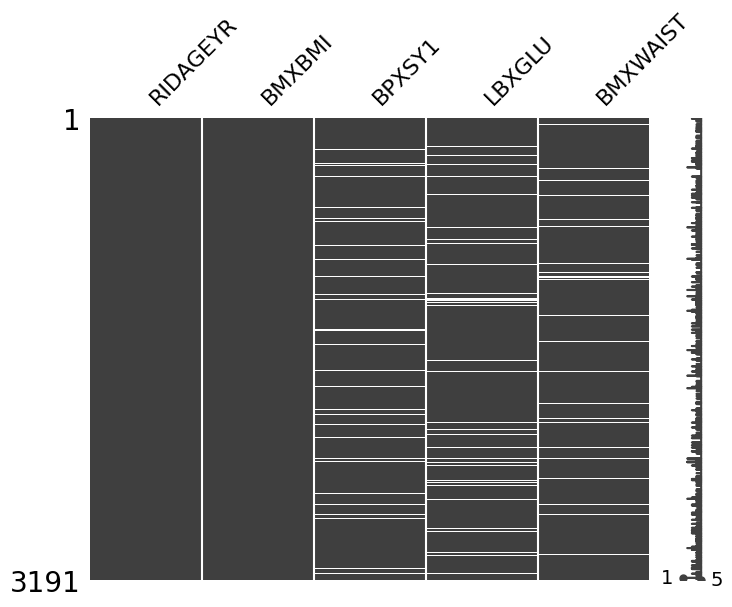

In [14]:
miss.matrix(data_query, figsize=(8,6))

<Axes: >

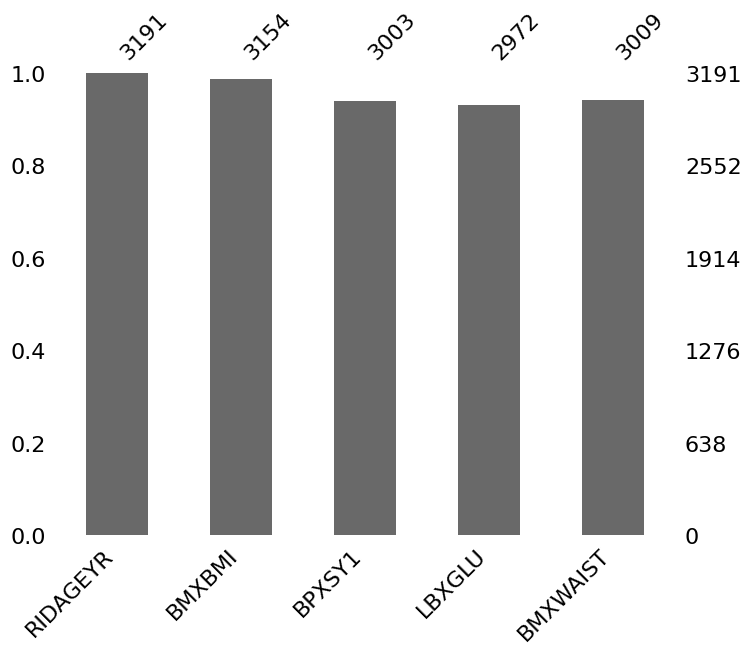

In [15]:
miss.bar(data_query, figsize=(8,6))

In [16]:
data_query.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RIDAGEYR,3191.0,43.806330,20.929036,12.0,25.0,43.0,61.0,80.0
BMXBMI,3154.0,28.491408,7.136934,14.1,23.4,27.5,32.3,64.5
BPXSY1,3003.0,123.208791,18.796077,78.0,110.0,120.0,132.0,236.0
LBXGLU,2972.0,110.609017,38.605914,21.0,94.0,101.0,111.0,479.0
BMXWAIST,3009.0,96.783018,17.841598,54.6,83.6,95.8,107.8,169.6


In [17]:
display(data_query[['RIDAGEYR']].min())
display(data_query[['RIDAGEYR']].max())

,0
RIDAGEYR,12.0


,0
RIDAGEYR,80.0


<Axes: xlabel='RIDAGEYR'>

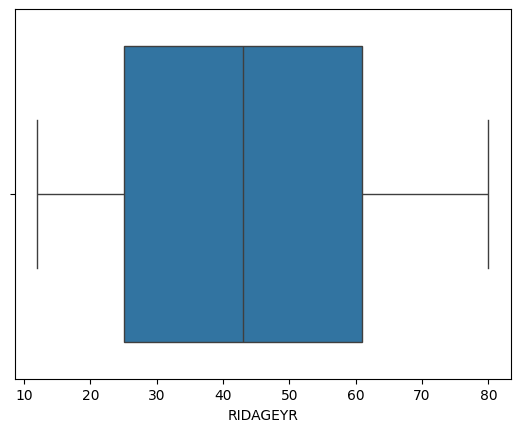

In [18]:
sns.boxplot(data=data_query.loc[lambda f: f['RIDAGEYR'] > 0], x='RIDAGEYR')

<Axes: xlabel='RIDAGEYR'>

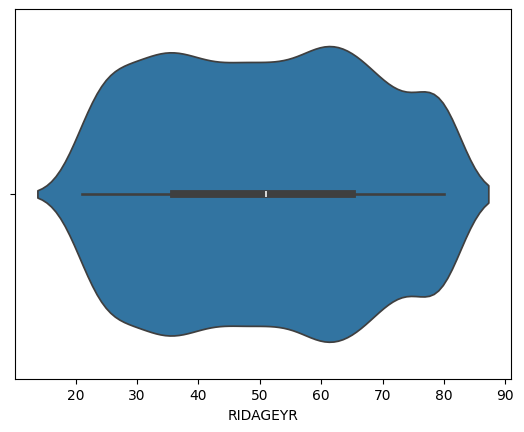

In [19]:
sns.violinplot(data=data_query.loc[lambda f: f['RIDAGEYR'] > 20], x='RIDAGEYR')

<Axes: xlabel='BMXBMI'>

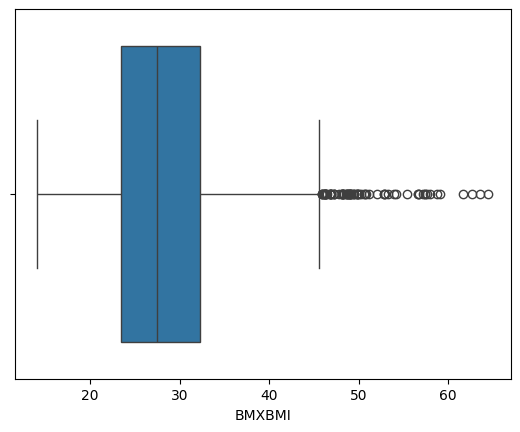

In [20]:
sns.boxplot(data=data_query.loc[lambda f: f['BMXBMI'] > 0], x = 'BMXBMI')

<Axes: xlabel='BMXBMI'>

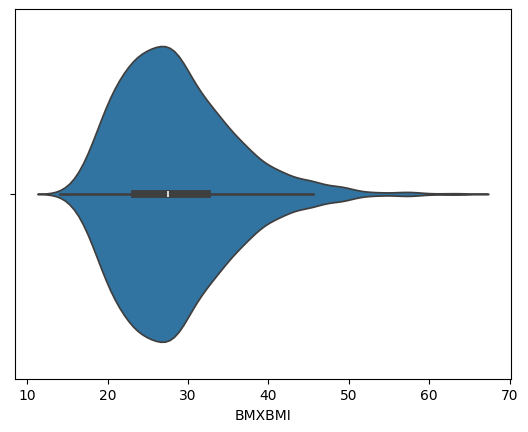

In [21]:
sns.violinplot(data=data_query.loc[lambda f: f['BMXBMI'] > 0], x = 'BMXBMI')

<Axes: xlabel='BPXSY1'>

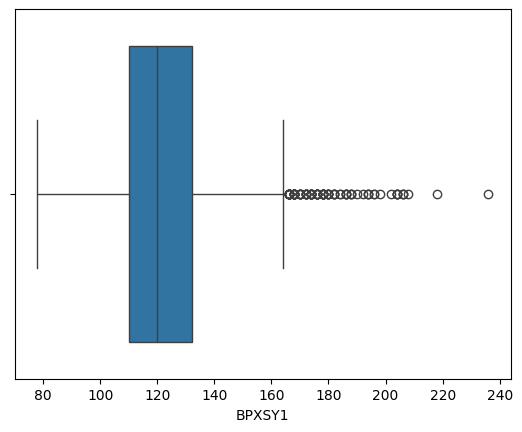

In [22]:
sns.boxplot(data=data_query[lambda f: f['BPXSY1'] >0], x = 'BPXSY1')

<Axes: xlabel='BPXSY1'>

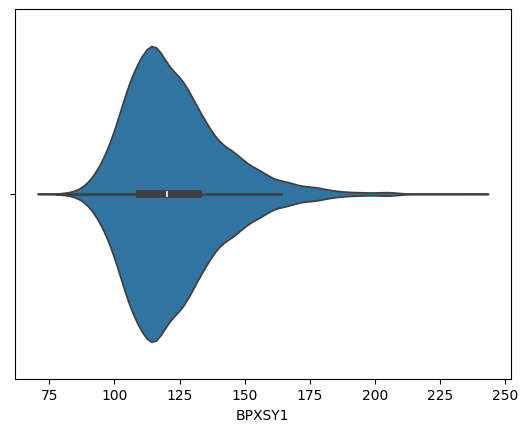

In [23]:
sns.violinplot(data=data_query[lambda f: f['BPXSY1'] >0], x = 'BPXSY1')

# Skewness positiva e curtose positiva

Uma skewness positiva significa que a distribuição tem uma cauda mais longa à direita, ou seja, que há uma maior concentração de dados em valores menores e que existem alguns valores extremos maiores (outliers) puxando a cauda para a direita.
Isso sugere uma maior presença de outliers, com dados mais concentrados próximos da média, mas com caudas mais pesadas. Mais dados estão próximos da média, mas existem valores extremos (outliers) tanto na cauda esquerda quanto na direita.

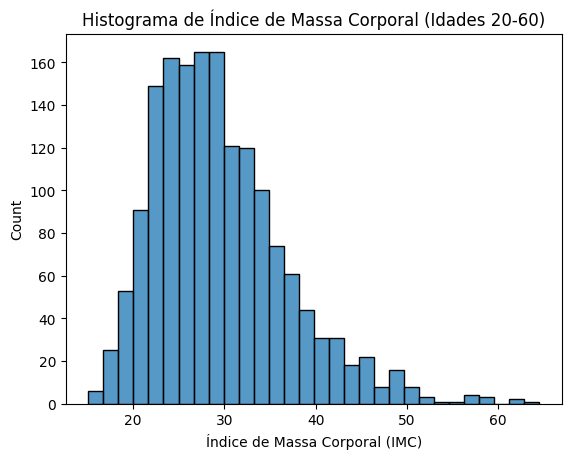

In [24]:
#IDADE x IMC
sns.histplot(data=data_query.loc[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR']<60)],
             x='BMXBMI',
             bins=30)
plt.title("Histograma de Índice de Massa Corporal (Idades 20-60)")
plt.xlabel("Índice de Massa Corporal (IMC)")
plt.show()

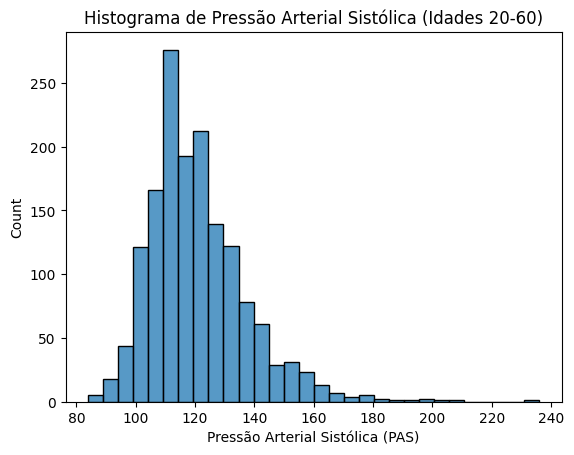

In [25]:
#IDADE x PRESSÃO SANGUÍNEA
sns.histplot(data=data_query.loc[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR']<60)],
             x='BPXSY1',
             bins=30)
plt.title("Histograma de Pressão Arterial Sistólica (Idades 20-60)")
plt.xlabel("Pressão Arterial Sistólica (PAS)")
plt.show()

# Análise exploratória
## Visualize a relação entre o Índice de Massa Corporal (IMC), a Pressão Arterial Sistólica (PAS) utilizando gráficos apropriados (por exemplo, scatter plot).

In [26]:
mean_bps = data_query.loc[(data_query['RIDAGEYR'] > 20) & (data_query['RIDAGEYR'] < 60), 'BPXSY1'].mean()
median_bps = data_query.loc[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR'] <60), 'BPXSY1'].median()
stdv_bps = data_query.loc[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR'] <60), 'BPXSY1'].std()
print(f'Mean PAS: {mean_bps:.2f}')
print(f'Median PAS: {median_bps:.2f}')
print(f'Std PAS: {stdv_bps:.2f}')

Mean PAS: 120.99
Median PAS: 118.00
Std PAS: 16.32


In [27]:
mean_bmi = data_query.loc[(data_query['RIDAGEYR'] > 20) & (data_query['RIDAGEYR'] < 60), 'BMXBMI'].mean()
median_bmi = data_query.loc[(data_query['RIDAGEYR'] > 20) & (data_query['RIDAGEYR'] < 60), 'BMXBMI'].median()
stdv_bmi = data_query.loc[(data_query['RIDAGEYR'] > 20) & (data_query['RIDAGEYR'] < 60), 'BMXBMI'].std()
print(f'Mean IMC: {mean_bmi:.2f}')
print(f'Median IMC: {median_bmi:.2f}')
print(f'Std IMC: {stdv_bmi:.2f}')

Mean IMC: 29.54
Median IMC: 28.40
Std IMC: 7.31


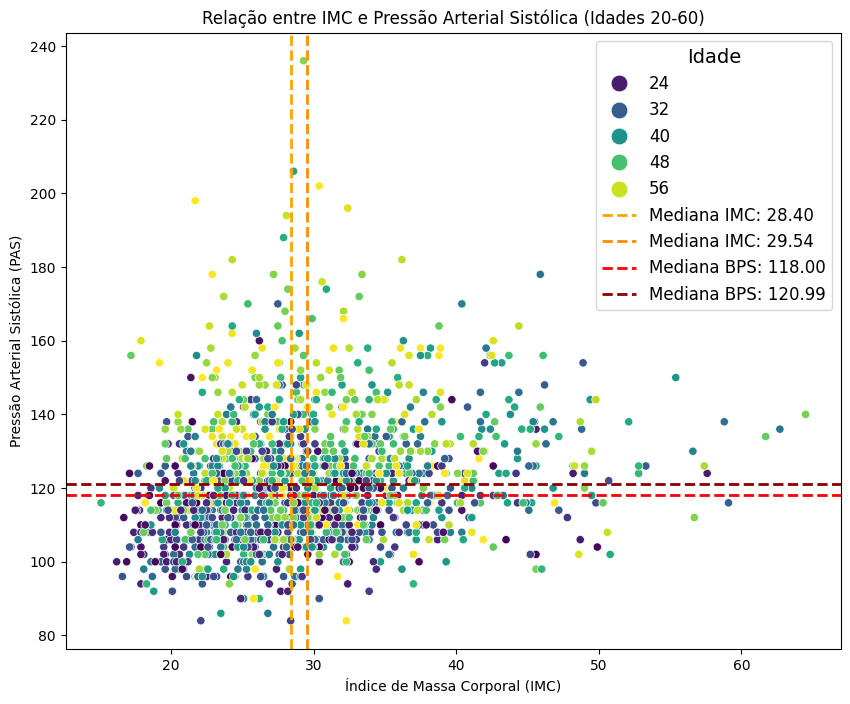

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=data_query[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR']<60)],
    x='BMXBMI',
    y='BPXSY1',
    hue='RIDAGEYR',
    palette='viridis'
)

plt.axvline(median_bmi, color='orange', linestyle='--', linewidth=2, label=f'Mediana IMC: {median_bmi:.2f}')
plt.axvline(mean_bmi, color='darkorange', linestyle='--', linewidth=2, label=f'Mediana IMC: {mean_bmi:.2f}')

plt.axhline(median_bps, color='red', linestyle='--', linewidth=2, label=f'Mediana BPS: {median_bps:.2f}')
plt.axhline(mean_bps, color='darkred', linestyle='--', linewidth=2, label=f'Mediana BPS: {mean_bps:.2f}')

plt.title("Relação entre IMC e Pressão Arterial Sistólica (Idades 20-60)")
plt.legend(title='Idade', fontsize=12, title_fontsize=14, markerscale=2)
plt.xlabel("Índice de Massa Corporal (IMC)")
plt.ylabel("Pressão Arterial Sistólica (PAS)")
plt.show()

<Figure size 2000x1000 with 0 Axes>

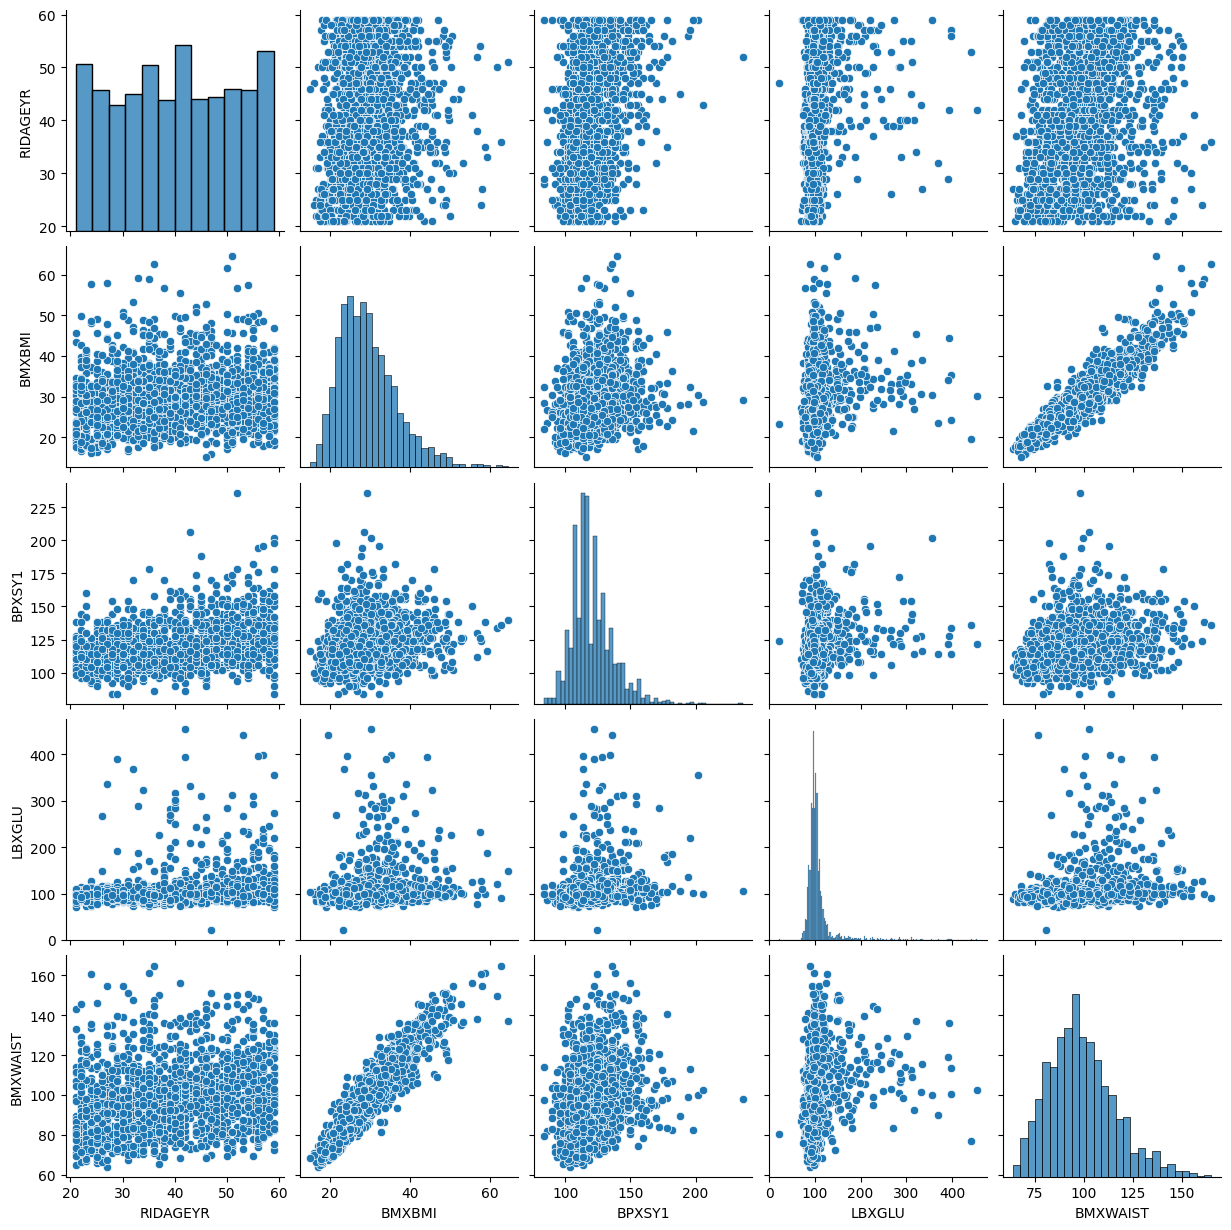

In [29]:
plt.figure(figsize=(20, 10))
sns.pairplot(
    data=data_query[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR']<60)]
    .reindex(columns=['RIDAGEYR', 'BMXBMI', 'BPXSY1', 'LBXGLU', 'BMXWAIST'])
)
plt.show()

# Imputation dos Missingvalues pela mediana uma vez que é mais robusta para lidar com outliers em uma distribuição assimétrica como BMX e BPX

In [30]:
# Imputando valores ausentes pela mediana
data_query['BMXBMI'].fillna(data_query['BMXBMI'].median(), inplace=True)
data_query['BPXSY1'].fillna(data_query['BPXSY1'].median(), inplace=True)
data_query['LBXGLU'].fillna(data_query['LBXGLU'].median(), inplace=True)
data_query['BMXWAIST'].fillna(data_query['BMXWAIST'].median(), inplace=True)



<ipython-input-30-8fbb7ba24ae8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_query['BMXBMI'].fillna(data_query['BMXBMI'].median(), inplace=True)
<ipython-input-30-8fbb7ba24ae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_query['BMXBMI'].fillna(data_query['BMXBMI'].median(), inplace=True)
<ipython-input-30-8fbb7ba24ae8>:3: Fu

<Axes: >

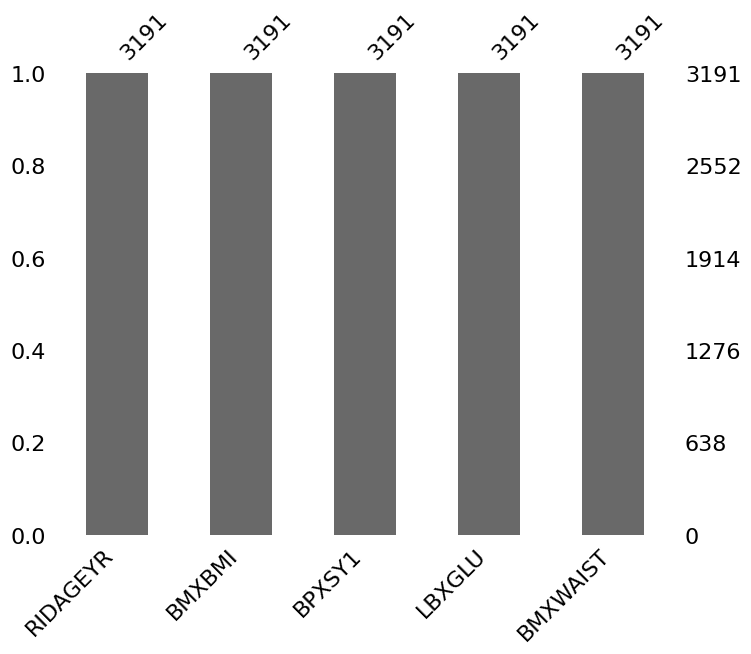

In [31]:
miss.bar(data_query, figsize=(8,6))

In [32]:
data_query.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RIDAGEYR,3191.0,43.806330,20.929036,12.0,25.0,43.0,61.0,80.0
BMXBMI,3191.0,28.479912,7.096218,14.1,23.5,27.5,32.2,64.5
BPXSY1,3191.0,123.019743,18.249454,78.0,110.0,120.0,132.0,236.0
LBXGLU,3191.0,109.949546,37.336313,21.0,95.0,101.0,110.0,479.0
BMXWAIST,3191.0,96.726951,17.326663,54.6,84.5,95.8,107.0,169.6


In [33]:
data_query.isnull().sum()

,0
RIDAGEYR,0
BMXBMI,0
BPXSY1,0
LBXGLU,0
BMXWAIST,0


In [34]:
# Gerando o relatório a partir do DataFrame
profile = ProfileReport(data_query, title="Relatório de Perfil - Filtro de Dados NHANES", explorative=True)

# Exibindo o relatório no notebook (se estiver usando Jupyter Notebook ou Google Colab)
profile.to_notebook_iframe()

# Para salvar o relatório em formato HTML
profile.to_file("relatorio_data_query.html")

Output hidden; open in https://colab.research.google.com to view.

#Perguntas:

## Parte 1

## 1 - Podemos afirmar, com base no modelo, que existe uma relação estatisticamente significativa entre o Índice de Massa Corporal (IMC) e a Pressão Arterial Sistólica (PAS)? Explique.

## Objetivo: criar um modelo de regressão linear para prever a Pressão Arterial Sistólica (PAS) a partir do Índice de Massa Corporal (IMC) e avaliar o desempenho deste modelo. Além disso, você deve interpretar os resultados obtidos, com foco na relação entre essas duas variáveis.

## Variável dependente (y): Pressão Arterial Sistólica (PAS)
## Variável independente (xn): Índice de Massa Corporal (IMC)

# Estimativa do modelo:





# y = b0 + b1x1

In [35]:
data_query

,RIDAGEYR,BMXBMI,BPXSY1,LBXGLU,BMXWAIST
0,53.0,30.8,146.0,101.0,107.9
1,78.0,28.8,138.0,84.0,116.5
2,42.0,20.3,100.0,84.0,80.4
3,72.0,28.6,116.0,107.0,92.9
4,22.0,28.0,110.0,95.0,86.6
...,...,...,...,...,...
3186,16.0,22.7,112.0,95.0,70.5
3187,69.0,28.1,164.0,108.0,101.1
3188,76.0,21.5,112.0,105.0,95.0
3189,26.0,33.8,118.0,101.0,110.2


In [37]:
#Y-predito [variável dependente] = Pressão Arterial Sistólica (PAS)
y = data_query[['BPXSY1']]
y

,BPXSY1
0,146.0
1,138.0
2,100.0
3,116.0
4,110.0
...,...
3186,112.0
3187,164.0
3188,112.0
3189,118.0


In [38]:
# x1 [varivale independente] = Índice de Massa Corporal (IMC)
x1 = data_query[['BMXBMI']]
x1

,BMXBMI
0,30.8
1,28.8
2,20.3
3,28.6
4,28.0
...,...
3186,22.7
3187,28.1
3188,21.5
3189,33.8


In [39]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     123.3
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           3.82e-28
Time:                        10:57:28   Log-Likelihood:                -13734.
No. Observations:                3191   AIC:                         2.747e+04
Df Residuals:                    3189   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.8861      1.312     83.024      0.000     106.315     111.458
BMXBMI         0.4963      0.045     11.106      0.000       0.409       0.584
==============================================================================
Omnibus:                      801.988   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2114.602
Skew:                           1.338   Prob(JB):                         0.00
Kurtosis:                       5.956   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [41]:
# Criando o modelo de regressão linear
model = LinearRegression()

In [42]:
# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

#

# Avaliação do modelo:
Avalie a qualidade do modelo usando métricas como o R2, o erro médio absoluto (MAE) ou o erro quadrático médio (MSE).

In [44]:
# Calculando o R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

# Calculando o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (Erro Quadrático Médio): {mse}")

# Calculando o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Erro Médio Absoluto): {mae}")

R²: 0.04063684838209369
MSE (Erro Quadrático Médio): 303.60557106225355
MAE (Erro Médio Absoluto): 13.218824132663359


Resposta:

1. R² (Coeficiente de Determinação): 0.0406
 O R² mede a proporção da variabilidade total da variável independente (x1) que é explicada pelo modelo. Ele varia de 0 a 1, no qual o valor igual a 1 elucida 100% da variação nos dados e igual a 0, o modelo não explica nada da variação nos dadps. Nesse caso, o valor do R2 indica que o modelo explica apenas 4.06% da variabilidade dos dados.

2. MSE (Erro Quadrático Médio): 303.605
O MSE é a média dos quadrados das diferenças entre os valores preditos e os valores reais. Nesse caso, o valor indica que o modelo está cometendo grandes erros de predição. Devido a particularidade na penalização mais forte do MSE, o resultado sugere que há discrepâncias entre previsões do modelo e os dados reais. O resultado não é satisfatório.

3. MAE (Erro Médio Absoluto): 13.218
O MAE mede a magnitude média dos erros sem considerar a direção (erro absoluto). Aqui, o modelo comete um erro médio de aproximadamente 13.21 unidades nas previsões. Isso significa que, em média, as previsões estão errando em cerca de 11 unidades em relação aos valores reais. Ideia reforçada de que o modelo não é preciso.

# Interprete os coeficientes do modelo.

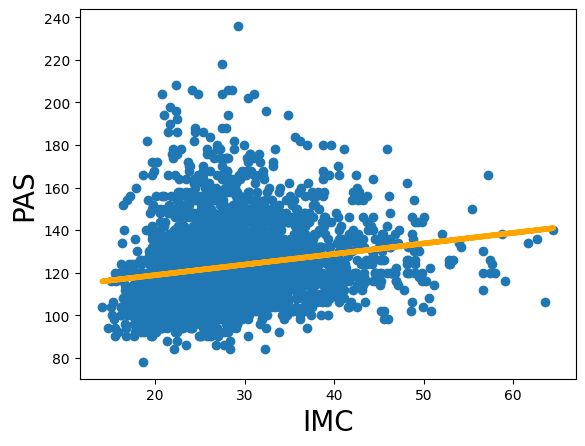

In [46]:
plt.scatter(x1,y)
#b0 (const) = 108.8861
#b1x = 0.4963
yhat = 0.4963*x1 + 108.8861

fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')

plt.xlabel('IMC', fontsize=20)
plt.ylabel('PAS', fontsize=20)

plt.show()

1. O modelo de regressão linear fornecido é da forma:
y = 0.4963*x1 + 108.8861

- No que tange a interpretação do modelo, pode-se dizer que com o aumento do IMC (variável independente - x1), haverá aumento para a pressão arterial (PAXS - variável independente) em 0.4963 unidades, com valor base de 108.8861.

- y é o valor predito (variável dependente).
- x1 é a variável independente

- 0.4963 é o coeficiente de regressão associado a x1 (inclinação da reta) ​
  - Este valor indica que para cada aumento unitário em x1, o valor predito de y aumenta em 0.4963 unidades. Nesse caso, se o IMC varia de 1 unidade, a previsão de PAS aumenta em aproximadamente 0.4963. Como o coeficiente é positivo, indica uma relação direta, ou seja, conforme x1 aumenta, y predito também aumenta.

- 108.8861 é o intercepto (o valor de y quando x1=0).
  - Nesse caso, x1=0, o valor de y predito é 108.8861. Se x1=0, o valor de y predito será de 108.8861.


# Perguntas:


1.   Podemos afirmar, com base no modelo, que existe uma relação estatisticamente significativa entre o Índice de Massa Corporal (IMC) e a Pressão Arterial Sistólica (PAS)? Explique.
 - Um valor P abaixo de 0,05 significa que a variável é significativa. Por isso o coeficiente é diferente de 0. Além disso, com um valor p de 0.000, pode-se afirmar com alta confiança que existe uma relação estatisticamente significativa entre o IMC e a PAS. Isso significa que o IMC é um preditor importante da PAS.**





#############################################################################

#Perguntas:

## Parte 2

## 2 - Refaça o exercício para IMC e o nível de glicose no sangue (LBGLU), e IMC e a circunferência da cintura (BMXWAIST). Quais dessas medidas estão correlacionadas?

## Objetivo: criar um modelo de regressão linear para prever o nível de glicose no sangue (LBGLU) a partir do Índice de Massa Corporal (IMC) e avaliar o desempenho deste modelo. Além disso, você deve interpretar os resultados obtidos, com foco na relação entre essas duas variáveis.

# Parte 2.1)

## Variável dependente (y): o nível de glicose no sangue (LBGLU)
## Variável independente (xn): Índice de Massa Corporal (IMC)

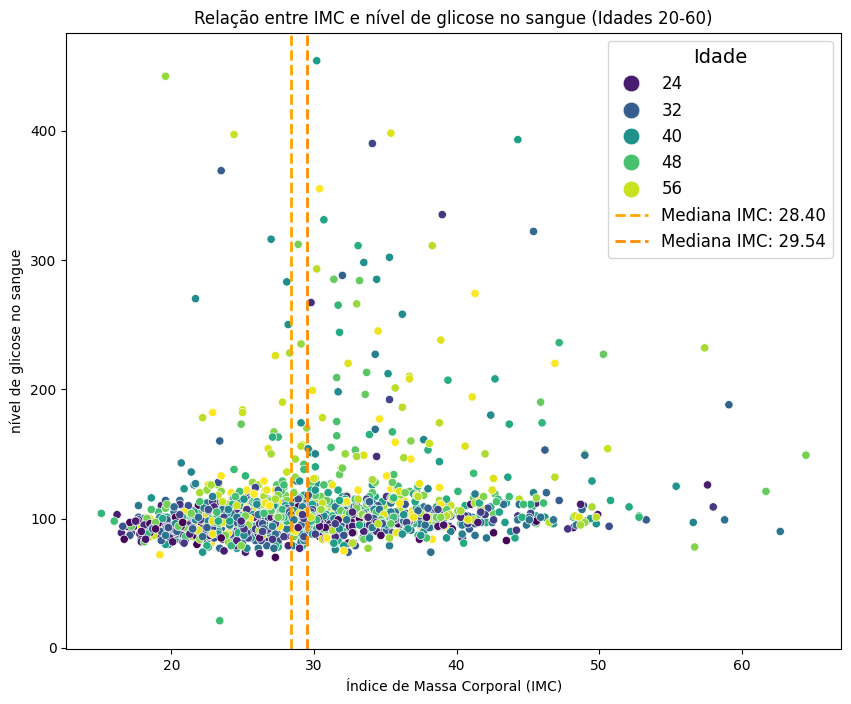

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=data_query[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR']<60)],
    x='BMXBMI',
    y='LBXGLU',
    hue='RIDAGEYR',
    palette='viridis'
)

plt.axvline(median_bmi, color='orange', linestyle='--', linewidth=2, label=f'Mediana IMC: {median_bmi:.2f}')
plt.axvline(mean_bmi, color='darkorange', linestyle='--', linewidth=2, label=f'Mediana IMC: {mean_bmi:.2f}')

# plt.axhline(median_bps, color='red', linestyle='--', linewidth=2, label=f'Mediana BPS: {median_bps:.2f}')
# plt.axhline(mean_bps, color='darkred', linestyle='--', linewidth=2, label=f'Mediana BPS: {mean_bps:.2f}')

plt.title("Relação entre IMC e nível de glicose no sangue (Idades 20-60)")
plt.legend(title='Idade', fontsize=12, title_fontsize=14, markerscale=2)
plt.xlabel("Índice de Massa Corporal (IMC)")
plt.ylabel("nível de glicose no sangue")
plt.show()

## Variável dependente (y): o nível de glicose no sangue (LBXGLU)
## Variável independente (xn): Índice de Massa Corporal (IMC)

In [47]:
#Y-predito [variável dependente] = o nível de glicose no sangue (LBGLU)
y = data_query[['LBXGLU']]
print(y)
# x1 [varivale independente] = Índice de Massa Corporal (IMC)
x1 = data_query[['BMXBMI']]
print(x1)

      LBXGLU
0      101.0
1       84.0
2       84.0
3      107.0
4       95.0
...      ...
3186    95.0
3187   108.0
3188   105.0
3189   101.0
3190    99.0

[3191 rows x 1 columns]
      BMXBMI
0       30.8
1       28.8
2       20.3
3       28.6
4       28.0
...      ...
3186    22.7
3187    28.1
3188    21.5
3189    33.8
3190    31.0

[3191 rows x 1 columns]


In [48]:
# Exibindo os Resultados da Regressão
# De qualquer forma, results.summary() exibirá os resultados da regressão e os organizará em três tabelas.

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LBXGLU   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     118.1
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           4.99e-27
Time:                        11:13:41   Log-Likelihood:                -16021.
No. Observations:                3191   AIC:                         3.205e+04
Df Residuals:                    3189   BIC:                         3.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.6378      2.685     30.401      0.000      76.373      86.903
BMXBMI         0.9941      0.091     10.865      0.000       0.815       1.173
==============================================================================
Omnibus:                     2981.945   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110361.239
Skew:                           4.538   Prob(JB):                         0.00
Kurtosis:                      30.343   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
# Criando o modelo de regressão linear
model = LinearRegression()
# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)
# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

In [50]:
# Calculando o R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

# Calculando o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (Erro Quadrático Médio): {mse}")

# Calculando o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Erro Médio Absoluto): {mae}")

R²: 0.031269638953412615
MSE (Erro Quadrático Médio): 1300.3544686554444
MAE (Erro Médio Absoluto): 18.234452936173895


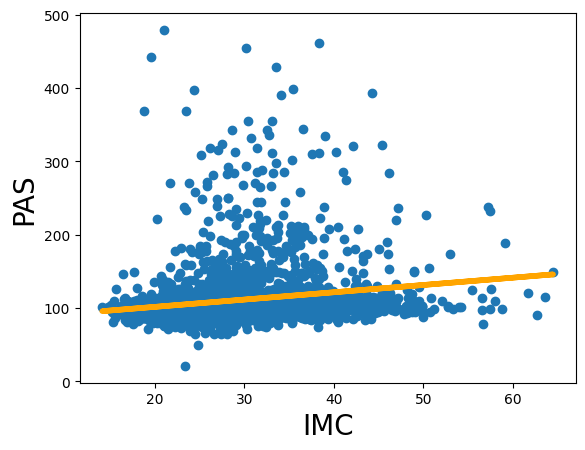

In [51]:
plt.scatter(x1,y)
#b0 (const) = 81.6378
#b1x = 0.9941
yhat = 0.9941*x1 + 81.6378

fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')

plt.xlabel('IMC', fontsize=20)
plt.ylabel('PAS', fontsize=20)

plt.show()

# Parte 2.2)

## Variável dependente (y): circunferência da cintura (BMXWAIST)
## Variável independente (xn): Índice de Massa Corporal (IMC)

In [52]:
#Y-predito [variável dependente] = circunferência da cintura (BMXWAIST)
y = data_query[['BMXWAIST']]
y
# x1 [varivale independente] = Índice de Massa Corporal (IMC)
x1 = data_query[['BMXBMI']]
x1

,BMXBMI
0,30.8
1,28.8
2,20.3
3,28.6
4,28.0
...,...
3186,22.7
3187,28.1
3188,21.5
3189,33.8


In [53]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BMXWAIST   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 1.123e+04
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:18:49   Log-Likelihood:                -11222.
No. Observations:                3191   AIC:                         2.245e+04
Df Residuals:                    3189   BIC:                         2.246e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.3591      0.597     59.243      0.000      34.189      36.529
BMXBMI         2.1548      0.020    105.963      0.000       2.115       2.195
==============================================================================
Omnibus:                      658.216   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.605
Skew:                          -0.821   Prob(JB):                         0.00
Kurtosis:                       8.402   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
# Criando o modelo de regressão linear
model = LinearRegression()
# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)
# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

In [55]:
# Calculando o R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

# Calculando o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (Erro Quadrático Médio): {mse}")

# Calculando o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Erro Médio Absoluto): {mae}")


R²: 0.8045596253329721
MSE (Erro Quadrático Médio): 63.73766563584555
MAE (Erro Médio Absoluto): 6.256723192971246


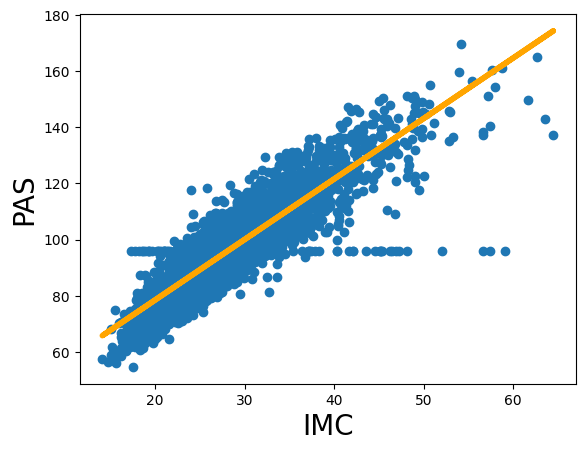

In [56]:
plt.scatter(x1,y)
#b0 (const) = 35.3591
#b1x = 2.1548
yhat = 2.1548*x1 + 35.3591
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')

plt.xlabel('IMC', fontsize=20)
plt.ylabel('PAS', fontsize=20)

plt.show()

# 2 - Refaça o exercício para IMC e o nível de glicose no sangue (LBXGLU), e IMC e a circunferência da cintura (BMXWAIST).

# Quais dessas medidas estão correlacionadas?

- Parte 2.1)
- Variável dependente (y): o nível de glicose no sangue (LBXGLU)
- Variável independente (xn): Índice de Massa Corporal (IMC)

  - R²: 0.031269638953412615
  - MSE (Erro Quadrático Médio): 1300.3544686554444
  - MAE (Erro Médio Absoluto): 18.234452936173895
  - valor de p = 0.000

  - yhat = 0.9941*x1 + 81.6378

    - Um R2 baixo indica que apenas 3,1% da variação no nível de glicose no sangue é explicada pelo IMC. Isso sugere uma fraca correlação entre essas duas variáveis.
    -  Os erros MSE e MAE são altos, o que confirma que o modelo não é muito bom para prever o nível de glicose com base no IMC.
    - Embora o valor de p indique que a relação é estatisticamente significativa, o baixo R2 mostra que o IMC tem pouco impacto prático sobre a glicose no sangue.
    - O coeficiente da equação (0.9941) é próximo de 1, sugerindo uma leve relação positiva entre IMC e glicose, mas essa relação é fraca, como refletido pelo baixo R2.

- Parte 2.2)

- Variável dependente (y): circunferência da cintura (BMXWAIST)
- Variável independente (xn): Índice de Massa Corporal (IMC)

  - R²: 0.8045596253329721
  - MSE (Erro Quadrático Médio): 63.73766563584555
  - MAE (Erro Médio Absoluto): 6.256723192971246
  - valor de p = 0.000

  - yhat = 2.1548*x1 + 35.3591

    - Um R2 de 80,4% significa que uma grande parte da variação na circunferência da cintura é explicada pelo IMC. Isso demonstra uma forte correlação entre essas variáveis.
    - O menor valor de erros (MSE e MAE) em comparação à parte 2.1 mostra que o modelo é mais preciso na previsão da circunferência da cintura com base no IMC.
    - Novamente, o valor de p indica que a relação é estatisticamente significativa.
    - O coeficiente da equação (2.1548) sugere uma forte relação positiva entre IMC e circunferência da cintura, onde um aumento no IMC está associado a um aumento considerável na circunferência.

- Portanto, na comparação e correlação das partes 2.1 e 2.2 chega-se a conclusão que a modelo de regressão 2.1 mostra uma correlação fraca, indicando que o IMC não é um bom preditor do nível de glicose no sangue. Em contrapartida, o modelo 2.2 apresenta uma correlação forte, mostrando que o IMC é um bom preditor da circunferência da cintura.

# 3 - Utilizando o modelo de regressão, qual seria o valor estimado da circunferência da cintura para um indivíduo com IMC igual a 25?

# Substuição do valor de IMC = 25 na equação
# yhat=2.1548x1+35.3591

In [59]:
#intercepto (constante)
b0 = 35.3591

#conf
b1 = 2.1548

#valor a ser calculado do IMC
x1 = 25

# Calculando o valor estimado da circunferência da cintura
circunf_estimada = b1 * x1 + b0
print(f'Circunferência Estimada: {circunf_estimada:.2f}cm')

Circunferência Estimada: 89.23cm
